<a href="https://colab.research.google.com/github/strawndri/data-visualization/blob/main/Notebooks/Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [1]:
# Pandas
import pandas as pd

In [2]:
# Seaborn
!pip install seaborn
import seaborn as sns

In [3]:
# Matplotlib
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 5))
plt.figure(figsize=(10, 5))
sns.set_palette('Set2')

<Figure size 720x360 with 0 Axes>

In [4]:
from scipy.stats import ranksums

# Extras

*   **Utilize `.get_figure()` para imprimir o gráfico sem o seu endereço de memória** 
*   **Para atribuir títulos aos gráficos, utilize: `.figure.suptitle()`**
*   **Para título, use `.set_title()`**
*   **Altera-se as labels do gráfico a partir da função `.set(xlabel='', ylabel='')`**
* **Caso queira salvar imagens dos gráficos, reserve em uma variável este com a função `.get_figure()`. Após isso, utilize a função `.savefig('endereco.png')`**

#Base de Dados I

In [5]:
url = 'https://raw.githubusercontent.com/strawndri/data-visualization/main/Data/tips.csv'
dados = pd.read_csv(url)
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

###Colunas

In [6]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [7]:
renomear = {'total_bill': 'valor_da_conta',
            'tip': 'gorjeta',
            'dessert': 'sobremesa',
            'day': 'dia_da_semana',
            'time': 'horario',
            'size': 'total_pessoas'}

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


###Linhas

In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
valores_sobremesa = {
    'No': 'Não',
    'Yes': 'Sim'
}

gorjetas.sobremesa = gorjetas.sobremesa.map(valores_sobremesa)



---



In [12]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [13]:
valores_dia_da_semana = {'Sun': 'Domingo', 
                         'Sat': 'Sábado',
                         'Thur': 'Quinta',
                         'Fri': 'Sexta'
}

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(valores_dia_da_semana)



---



In [14]:
gorjetas.horario.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [15]:
valores_horario = {
    'Dinner': 'Janta',
     'Lunch': 'Almoço'
}

gorjetas.horario = gorjetas.horario.map(valores_horario)

In [16]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4


## Análise I

In [17]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4


[Text(0, 0.5, 'Gorjetas'), Text(0.5, 0, 'Valor da Conta')]

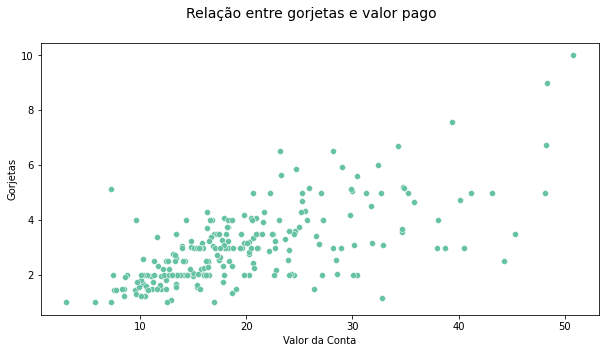

In [18]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
valor_gorjeta.figure.suptitle('Relação entre gorjetas e valor pago', fontsize=14)
valor_gorjeta.set(xlabel='Valor da Conta', ylabel='Gorjetas')

Quanto maior é o valor da conta paga, maior é a taxa de gorjeta.

### Quantidade de resultados

In [19]:
gorjetas.count()

valor_da_conta    244
gorjeta           244
sobremesa         244
dia_da_semana     244
horario           244
total_pessoas     244
dtype: int64

In [20]:
print(f"A base de dados contém {gorjetas.shape[0]} casos registrados (corretamente).")

A base de dados contém 244 casos registrados (corretamente).


### Porcentagem

In [21]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta).round(2)

In [22]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


### Gráfico I

Text(0.5, 0.98, 'Comparação: Porcentagem e Valor da Conta')

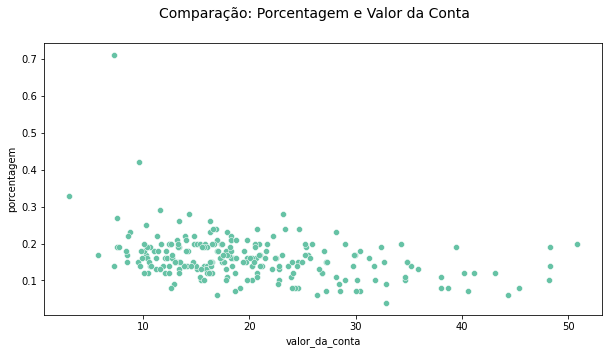

In [23]:
porcentagem_conta = sns.scatterplot(x="valor_da_conta", y="porcentagem", data=gorjetas)
porcentagem_conta.figure.suptitle('Comparação: Porcentagem e Valor da Conta', fontsize=14)

Percebe-se que o valor pago não é proporcional a porcentagem, que está relacionando o **valor da conta** e a **gorjeta**.

### Gráfico II

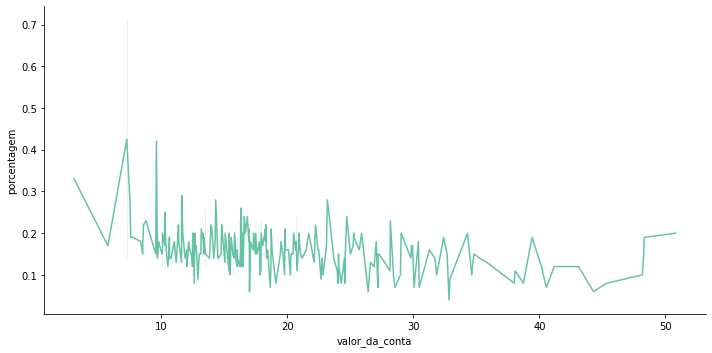

In [24]:
porcentagem_conta2 = sns.relplot(x="valor_da_conta", y="porcentagem", kind="line", data=gorjetas, aspect=2)

### Gráfico III

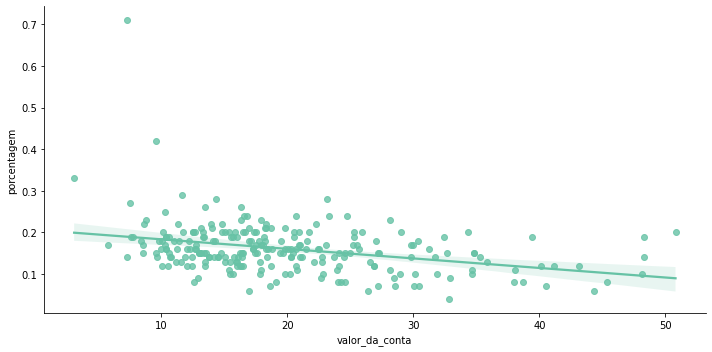

In [25]:
porcentagem_conta3 = sns.lmplot(x="valor_da_conta", y="porcentagem", data=gorjetas, aspect=2)

## Análise II

In [26]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


In [27]:
# Pessoas que pediram sobremesa
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [28]:
# Pessoas que não pediram sobremesa
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


### Gráfico I

Text(0.5, 0.98, 'Relação entre a gorjeta e se foi pedido ou não sobremesa')

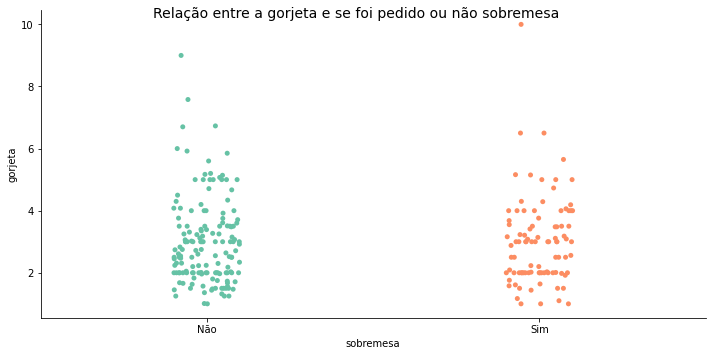

In [29]:
grafico_sobremesa1 = sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas, aspect=2)
grafico_sobremesa1.figure.suptitle('Relação entre a gorjeta e se foi pedido ou não sobremesa', fontsize=14)

### Gráfico II

Text(0.5, 0.98, 'Relação entre a gorjeta, o valor da conta e se foi pedido ou não sobremesa')

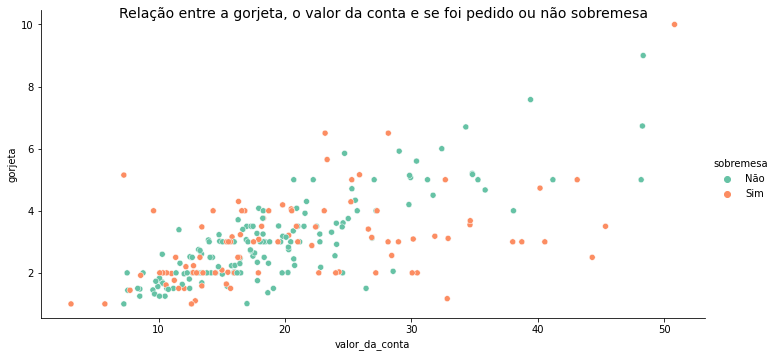

In [30]:
grafico_sobremesa2 = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas, aspect=2)
grafico_sobremesa2.figure.suptitle('Relação entre a gorjeta, o valor da conta e se foi pedido ou não sobremesa', fontsize=14)

###Gráfico III

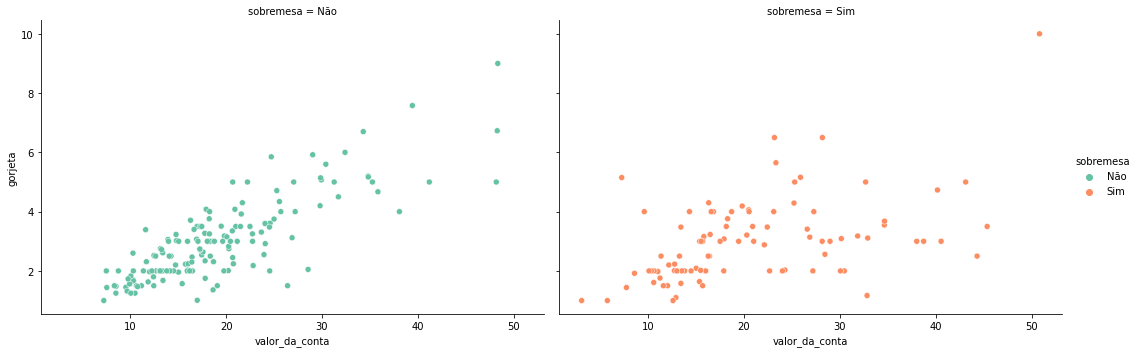

In [31]:
grafico_sobremesa3 = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas, aspect=1.5)

Gráfico IV

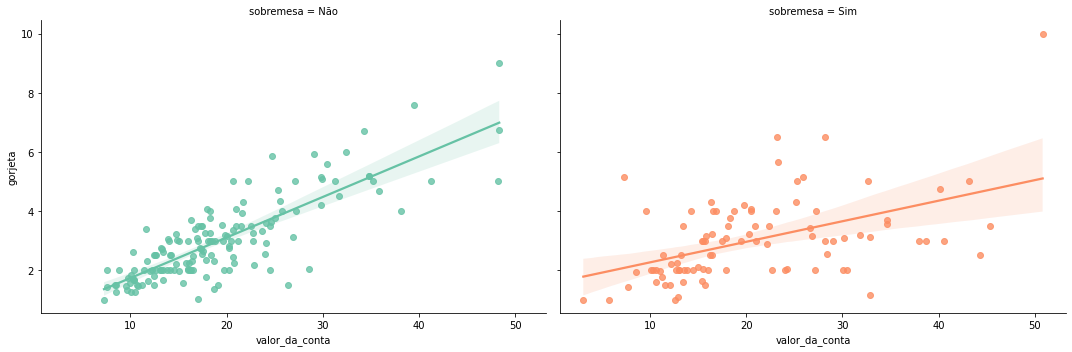

In [32]:
grafico_sobremesa4 = sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas, aspect=1.5)

### Gráfico V

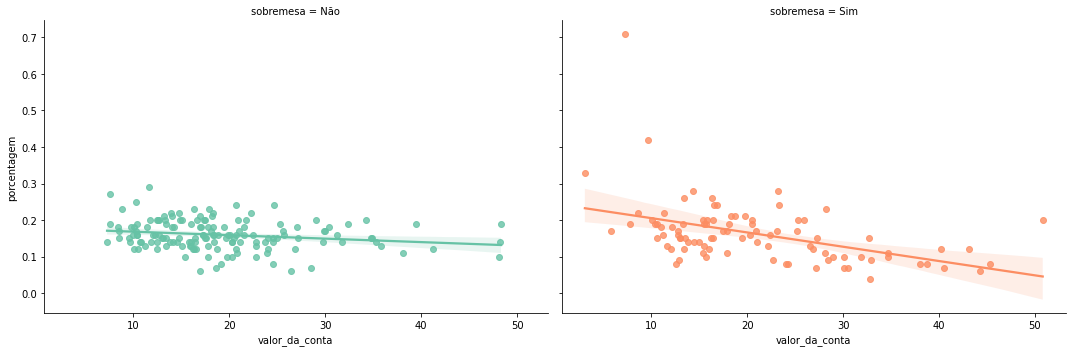

In [33]:
grafico_sobremesa4 = sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas, aspect=1.5)

### Gráfico VI

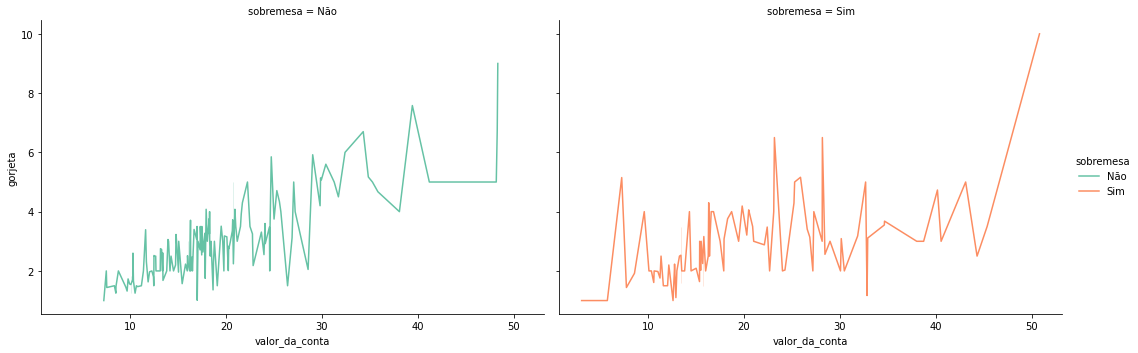

In [34]:
grafico_sobremesa6 = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas, aspect=1.5)

### Teste de Hipótese

Um **teste de hipótese** estatística é um procedimento que, a partir de determinadas possibilidades, é capaz de retornar o resultado obtido após a realização de testes. 

Nesse sentido, para que um teste de hipótese seja efetuado é preciso um valor **H<sup>0</sup>**, a hipótese inicial. Se esta não for verdadeira, observa-se a hipótese alternativa **(H<sup>1</sup>)** 

**Hipóteses:**
> H<sup>null</sup> : A distribuição da taxa da grojeta é a mesma para ambos os grupos *(em relação à escolha de sobremesa).*

> H<sup>alt</sup> : A distribuição da taxa da grojeta não é a mesma para ambos os grupos *(em relação à escolha de sobremesa).*

**Obs: A hipótese alternativa é utilizada quando o p-value está próxima ao valor 0.05, isto é, inferior a 5%**

In [35]:
com_sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [36]:
r = ranksums(com_sobremesa, sem_sobremesa)

In [37]:
print(f'O valor do p-value é: {r.pvalue:.2f}')

O valor do p-value é: 0.53


**Resultado final:**

> A hipótese escolhida é a nula **(H<sup>null</sup>)**

> A distribuição da taxa da grojeta é a mesma para ambos os grupos (em relação à escolha de sobremesa).

## Análise III - Dias da Semana

In [38]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


In [39]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

### Gráfico I

Text(0.5, 0.98, 'Dias da Semana')

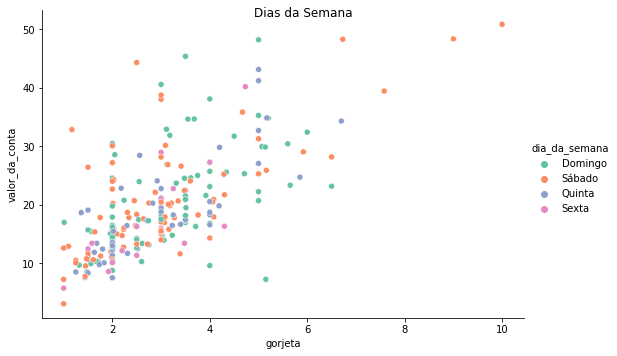

In [40]:
grafico_dias1 = sns.relplot(x='gorjeta', y='valor_da_conta', hue='dia_da_semana', data=gorjetas, aspect=1.5)
grafico_dias1.figure.suptitle('Dias da Semana', fontsize=12)

### Gráfico II

Text(0.5, 0.98, 'Dias da Semana')

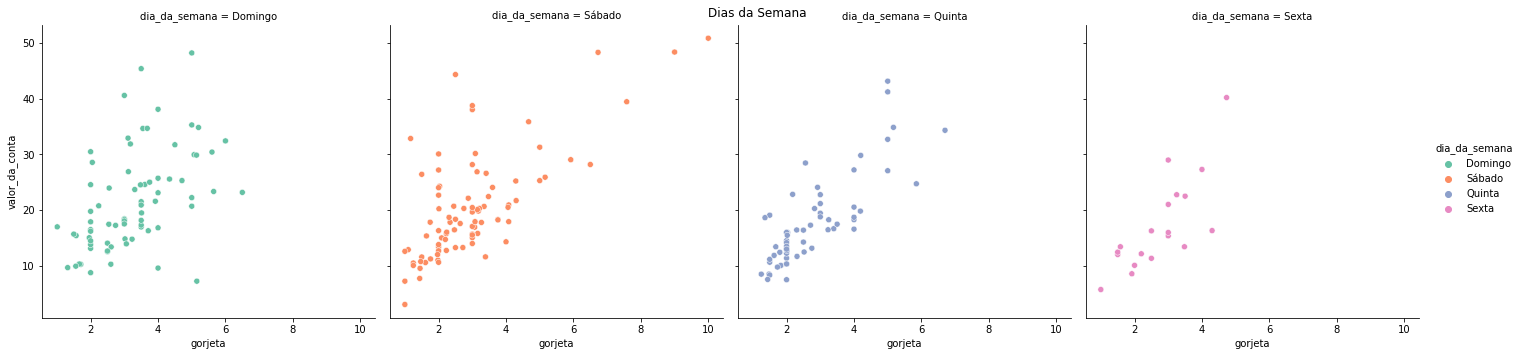

In [41]:
grafico_dias2 = sns.relplot(x='gorjeta', y='valor_da_conta', hue='dia_da_semana', col="dia_da_semana", data=gorjetas)
grafico_dias2.figure.suptitle('Dias da Semana', fontsize=12)

### Gráfico III

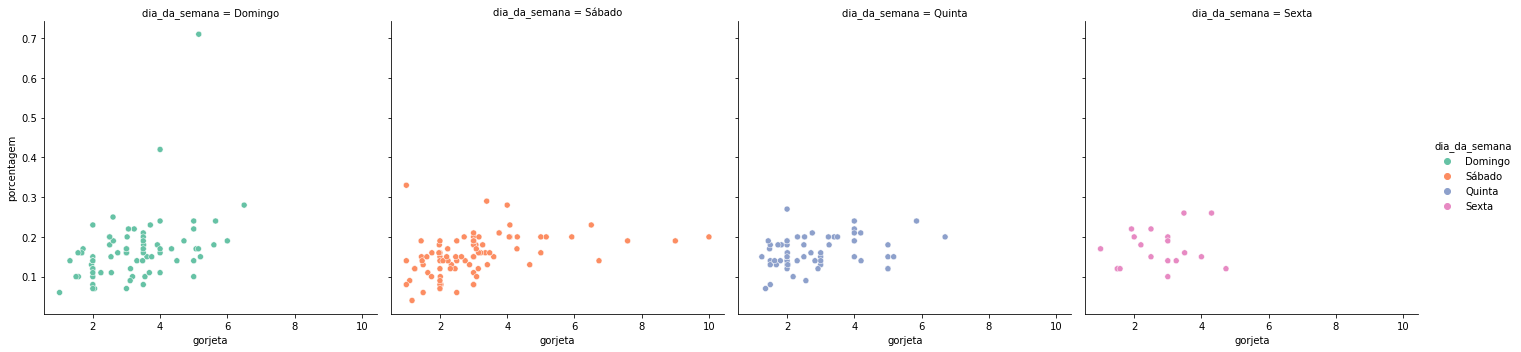

In [42]:
grafico_dias3 = sns.relplot(x='gorjeta', y='porcentagem', hue='dia_da_semana', col="dia_da_semana", data=gorjetas)

### Gráfico IV

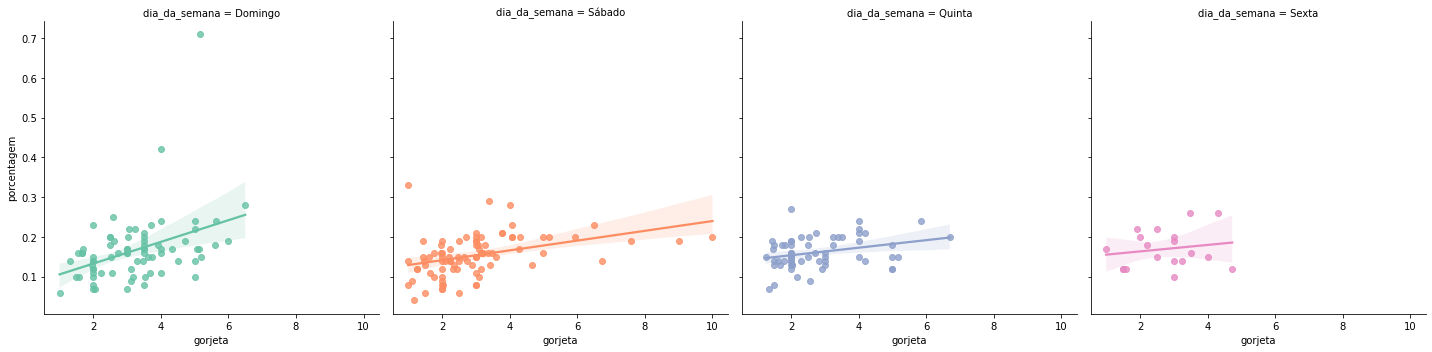

In [43]:
grafico_dias4 = sns.lmplot(x='gorjeta', y='porcentagem', hue='dia_da_semana', col="dia_da_semana", data=gorjetas)

### Análise Descritiva

In [44]:
media_gorjetas = gorjetas.gorjeta.mean()

print(f'O valor médio das gorjetas é: {media_gorjetas:.3f}')

O valor médio das gorjetas é: 2.998


In [45]:
print('Média de valores pelo dia da semana')
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

Média de valores pelo dia da semana


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [46]:
pessoas_por_dia = gorjetas.dia_da_semana.value_counts()

print('Quantidade de pessoas por dia (Frequência)')
for dia, n in pessoas_por_dia.items():
  print(f'{dia}: {n} pessoas')

Quantidade de pessoas por dia (Frequência)
Sábado: 87 pessoas
Domingo: 76 pessoas
Quinta: 62 pessoas
Sexta: 19 pessoas


### Teste de Hipótese

> **H<sup>null</sup>:** Os valores da conta são iguais no Sábado e no Domingo

> **H<sup>alt</sup>:** Os valores da conta são diferentes no Sábado e no Domingo

In [47]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [48]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

print(f'O p-value, comparando o Sábado e o Domingo, é: {r2.pvalue:.2f}')

O p-value, comparando o Sábado e o Domingo, é: 0.36


**Resultado Final**

> **H<sup>null</sup>:** Os valores da conta são iguais no Sábado e no Domingo

> A diferença de valores pagos no Sábado em relação ao Domingo é insificiante. Logo, o a hipótese nula foi comprovada *(p-value maior do que 5%)*

## Análise V - Hora do Dia

In [49]:
gorjetas.horario.unique()

array(['Janta', 'Almoço'], dtype=object)

### Gráfico I

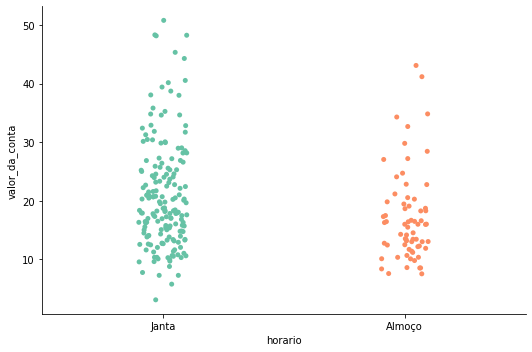

In [50]:
grafico_horario1 = sns.catplot(x='horario', y='valor_da_conta', data=gorjetas, aspect=1.5)

### Gráfico II

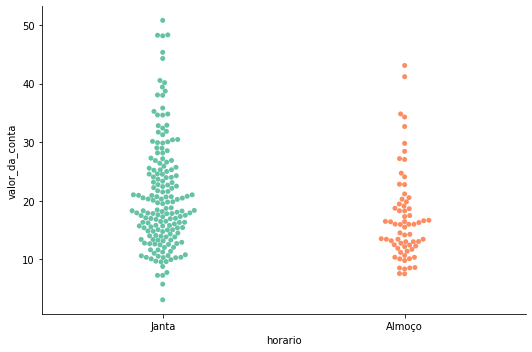

In [51]:
grafico_horario2 = sns.catplot(x='horario', y='valor_da_conta', data=gorjetas, kind='swarm',  aspect=1.5)

### Gráfico III

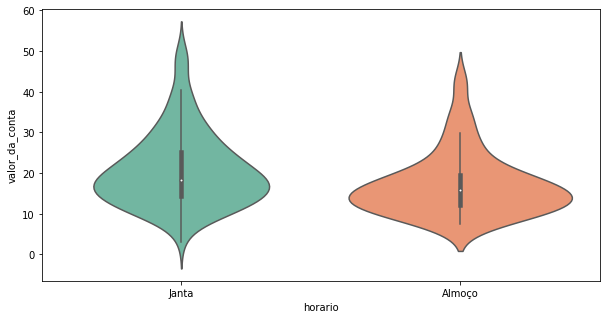

In [52]:
grafico_horario3 = sns.violinplot(x='horario', y='valor_da_conta', data=gorjetas,  aspect=1.5)

### Gráfico IV

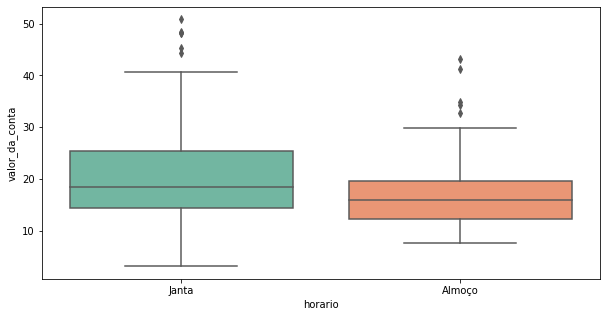

In [53]:
grafico_horario4 = sns.boxplot(x='horario', y='valor_da_conta', data=gorjetas)

### Gráfico V

#### Almoço

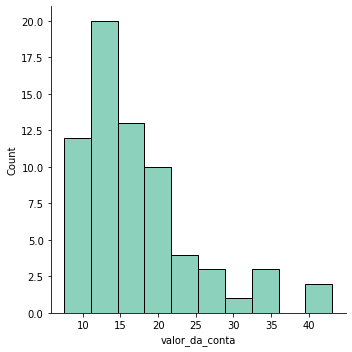

In [54]:
almoco = gorjetas.query('horario == "Almoço"').valor_da_conta
grafico_horario5 = sns.displot(almoco, kde=False)

#### Janta

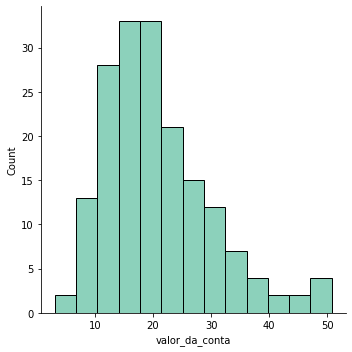

In [55]:
janta = gorjetas.query('horario == "Janta"').valor_da_conta
grafico_horario5 = sns.displot(janta, kde=False)

### Teste de Hipótese I

> **H<sup>null</sup>:** A distribuição de valores, entre os horários de Almoço e Janta, é igual

> **H<sup>alt</sup>:** A distribuição de valores, entre os horários de Almoço e Jantas, não é igual

In [56]:
gorjetas.groupby(['horario']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
horario,,,
Almoço,17.168676,2.728088,0.163971
Janta,20.797159,3.102670,0.159773


In [57]:
r3 = ranksums(almoco, janta)
print(f'O p-value é: {r3.pvalue:.4f}')

O p-value é: 0.0012


**Resultado Final**

> **H<sup>alt</sup>:** A distribuição de valores, entre os horários de Almoço e Janta, não igual

> A hipótese aceita é alternativa, pois o valor do p-value está abaixo do limite (5% ou 0.05)

### Teste de Hipótese II

> **H<sup>null</sup>:** A porcentagem, entre os horários de Almoço e Janta, é igual

> **H<sup>alt</sup>:** A porcentagem, entre os horários de Almoço e Jantas, não é igual

In [58]:
almoco = gorjetas.query('horario == "Almoço"').porcentagem
janta = gorjetas.query('horario == "Janta"').porcentagem

In [59]:
r4 = ranksums(almoco, janta)
print(f'O p-value é: {r4.pvalue:.2f}')

O p-value é: 0.26


**Resultado Final**

> **H<sup>null</sup>:** A porcentagem, entre os horários de Almoço e Jantas, é igual

> A hipótese aceita é a nula, uma vez que a os valores de porcentagem en Almoço e Janta são semelhantes (p-value maior que 5%).

# Base de Dados II

In [60]:
url = ('https://raw.githubusercontent.com/strawndri/data-visualization/main/Data/tips_atualizado.csv')
data = pd.read_csv(url)
data.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Análise I

In [61]:
data.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


[Text(0, 0.5, 'tip'), Text(0.5, 0, 'total_bill')]

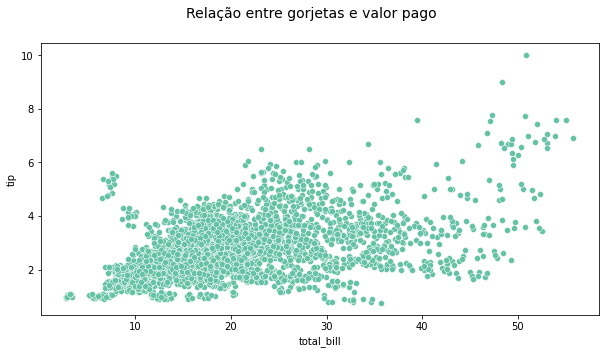

In [63]:
valor_gorjeta = sns.scatterplot(x='total_bill', y='tip', data=data)
valor_gorjeta.figure.suptitle('Relação entre gorjetas e valor pago', fontsize=14)
valor_gorjeta.set(xlabel='total_bill', ylabel='tip')

Quanto maior é o valor da conta paga, maior é a taxa de gorjeta.

### Quantidade de resultados

In [64]:
data.count()

total_bill    3416
tip           3416
dessert       3416
day           3416
time          3416
size          3416
dtype: int64

In [65]:
print(f"A base de dados contém {data.shape[0]} casos registrados (corretamente).")

A base de dados contém 3416 casos registrados (corretamente).


### Porcentagem

In [72]:
data['percentage'] = (data.tip / data.total_bill).round(2)

In [70]:
data.head()

,total_bill,tip,dessert,day,time,size,percentege
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


### Gráfico I

Text(0.5, 0.98, 'Comparação: Porcentagem e Valor da Conta')

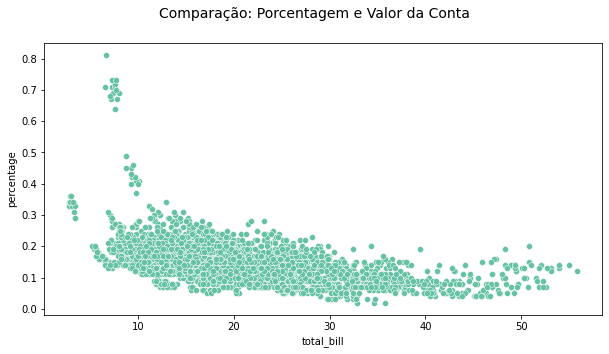

In [73]:
percentage_bill = sns.scatterplot(x="total_bill", y="percentage", data=data)
percentage_bill.figure.suptitle('Comparação: Porcentagem e Valor da Conta', fontsize=14)

Percebe-se que o valor pago não é proporcional a porcentagem, que está relacionando o **valor da conta** e a **gorjeta**.

### Gráfico II

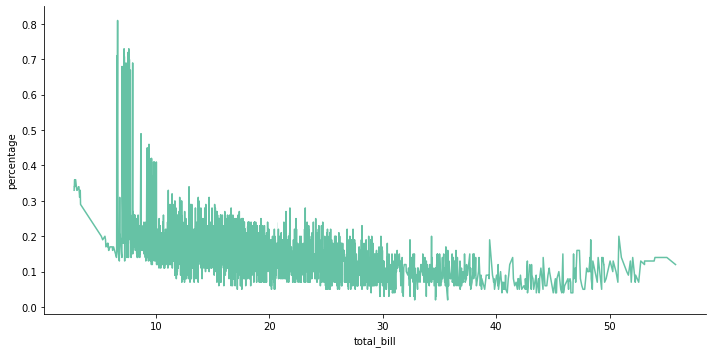

In [74]:
percentagem_bill2 = sns.relplot(x="total_bill", y="percentage", kind="line", data=data, aspect=2)

### Gráfico III

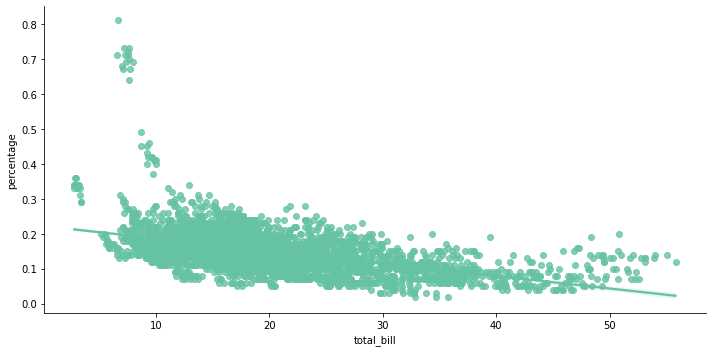

In [75]:
percentage_bill3 = sns.lmplot(x="total_bill", y="percentage", data=data, aspect=2)